In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
sales=pd.read_csv('/Users/sangeetha/DataScienceProjects/m5-forecasting-accuracy/sales_train_validation.csv')

calendar=pd.read_csv('/Users/sangeetha/DataScienceProjects/m5-forecasting-accuracy/calendar.csv')

sellprice =pd.read_csv('/Users/sangeetha/DataScienceProjects/m5-forecasting-accuracy/sell_prices.csv')


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
from sklearn.model_selection import train_test_split 

In [4]:
from datetime import datetime
import datetime as dt
calendar['date'] = calendar['date'].apply(lambda x: 
                                    dt.datetime.strptime(x, '%Y-%m-%d'))
calendar.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
cal=calendar[['date','wm_yr_wk']]
price=sellprice[['sell_price','wm_yr_wk']]
dataset=pd.merge(cal,price , on='wm_yr_wk')

In [6]:
dataset.head()

,date,wm_yr_wk,sell_price
0,2011-01-29,11101,0.46
1,2011-01-29,11101,1.56
2,2011-01-29,11101,3.17
3,2011-01-29,11101,5.98
4,2011-01-29,11101,0.70


In [7]:
dataset=dataset.drop('wm_yr_wk', axis=1)

In [8]:
dataset.set_index(['date'])

,sell_price
date,
2011-01-29,0.46
2011-01-29,1.56
2011-01-29,3.17
2011-01-29,5.98
2011-01-29,0.70
...,...
2016-06-19,2.98
2016-06-19,2.48
2016-06-19,3.98


In [9]:
dataset.date = pd.to_datetime(dataset.date)
dataset.set_index('date', inplace=True)

In [10]:
float_cols = dataset.select_dtypes(include=['float'])

for col in float_cols.columns:
    dataset[col] = pd.to_numeric(dataset[col], downcast ='float')

print(dataset.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47735397 entries, 2011-01-29 to 2016-06-19
Data columns (total 1 columns):
 #   Column      Dtype  
---  ------      -----  
 0   sell_price  float32
dtypes: float32(1)
memory usage: 546.3 MB
None


In [11]:
dataset.memory_usage(deep=True)

Index         381883176
sell_price    190941588
dtype: int64

In [12]:
dataset["sell_price"].memory_usage()


572824764

In [13]:
dataset.shape


(47735397, 1)

In [14]:
train_dataset = dataset[-47735397:-14320619]
val_dataset = dataset[-14320619:]

In [15]:

#random.shuffle(dataset) 
test_dataset, training_dataset = train_test_split(dataset, train_size=0.5, test_size=0.5,random_state=True)

print(train_dataset)

            sell_price
date                  
2011-01-29        0.46
2011-01-29        1.56
2011-01-29        3.17
2011-01-29        5.98
2011-01-29        0.70
...                ...
2015-03-06        8.97
2015-03-06        0.84
2015-03-06        4.97
2015-03-06        4.98
2015-03-06        2.98

[33414778 rows x 1 columns]


from sklearn.model_selection import train_test_split
random.shuffle(dataset)
test_dataset, training_dataset = sklearn.model_selection.train_test_split(dataset, train_size=23867699, test_size=23867698,r)

print(training_dataset)

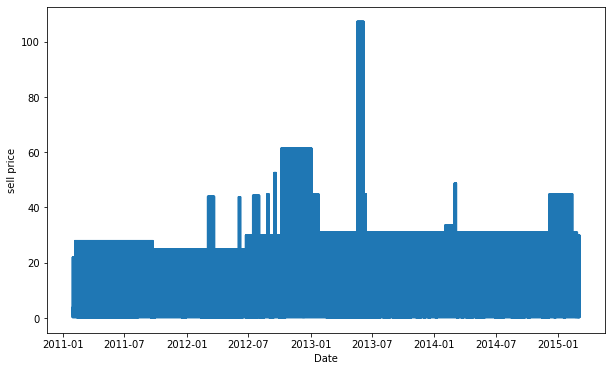

In [16]:
##plot graph

plt.xlabel("Date")
plt.ylabel("sell price")
plt.plot(train_dataset)

In [17]:
rollmean=train_dataset.rolling(window=12).mean()
rolstd=train_dataset.rolling(window=12).std()
print(rollmean,rolstd)

            sell_price
date                  
2011-01-29         NaN
2011-01-29         NaN
2011-01-29         NaN
2011-01-29         NaN
2011-01-29         NaN
...                ...
2015-03-06      4.8475
2015-03-06      4.5025
2015-03-06      4.4700
2015-03-06      4.6450
2015-03-06      4.6875

[33414778 rows x 1 columns]             sell_price
date                  
2011-01-29         NaN
2011-01-29         NaN
2011-01-29         NaN
2011-01-29         NaN
2011-01-29         NaN
...                ...
2015-03-06    2.329956
2015-03-06    2.599472
2015-03-06    2.590198
2015-03-06    2.543528
2015-03-06    2.507893

[33414778 rows x 1 columns]


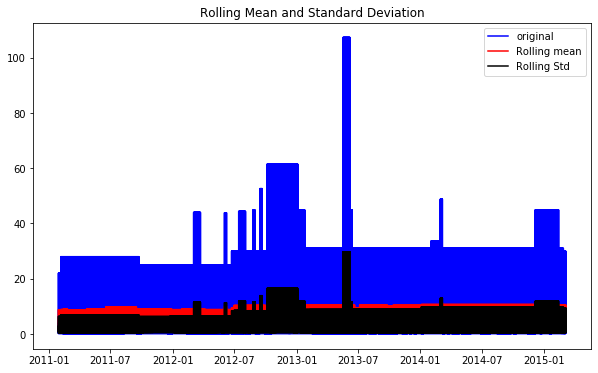

In [18]:
#plot rolling statistics
orig=plt.plot(train_dataset, color='blue', label='original')
mean=plt.plot(rollmean, color='red',label='Rolling mean')
std=plt.plot(rolstd, color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

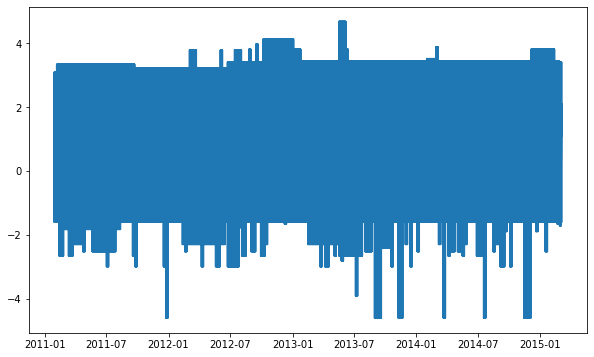

In [19]:
#Estimating trend
dataset_logscale=np.log(train_dataset)
plt.plot(dataset_logscale)

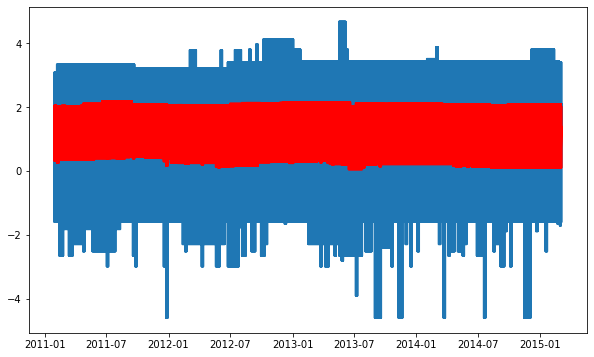

In [20]:
movingaverage= dataset_logscale.rolling(window=12).mean()
movingstd=dataset_logscale.rolling(window=12).std()
plt.plot(dataset_logscale)
plt.plot(movingaverage, color='red')

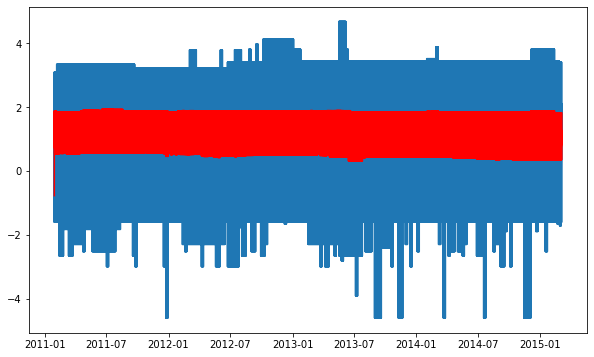

In [21]:
weightedaverage=dataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(dataset_logscale)
plt.plot(weightedaverage, color='red')

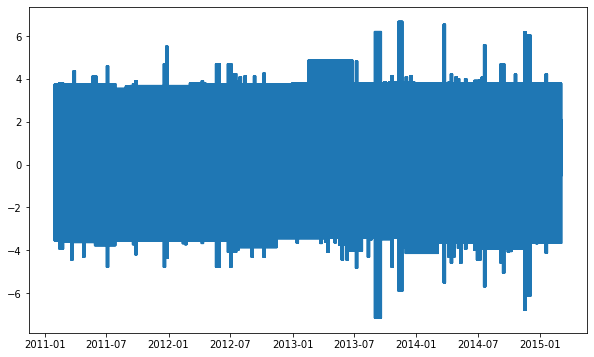

In [22]:
datasetlogdiffshifting=dataset_logscale-dataset_logscale.shift()
plt.plot(datasetlogdiffshifting)

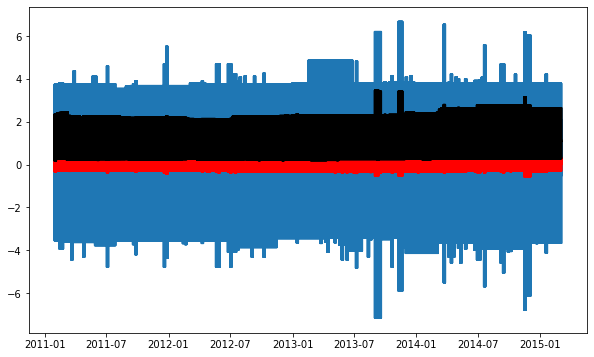

In [23]:
movingaverage= datasetlogdiffshifting.rolling(window=12).mean()
movingstd=datasetlogdiffshifting.rolling(window=12).std()
plt.plot(datasetlogdiffshifting)
plt.plot(movingaverage, color='red')
plt.plot(movingstd, color='black')

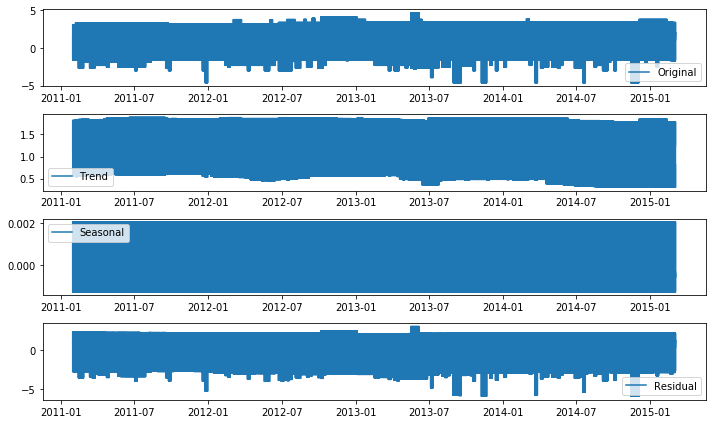

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset_logscale, period=30)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(dataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()



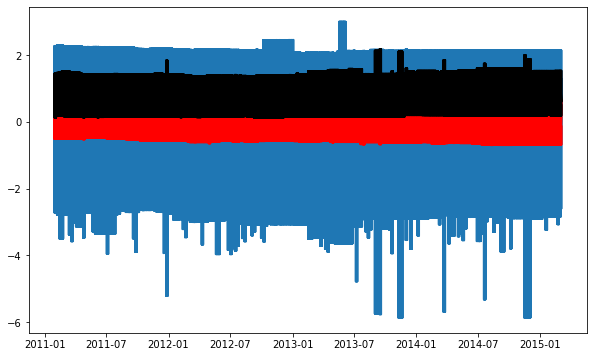

In [25]:
decompositionlogdata=residual
decompositionlogdata.dropna(inplace=True)
movingaverage= decompositionlogdata.rolling(window=12).mean()
movingstd=decompositionlogdata.rolling(window=12).std()
plt.plot(decompositionlogdata)
plt.plot(movingaverage, color='red')
plt.plot(movingstd, color='black')



In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetlogdiffshifting,nlags=20,fft=False)


#plot acf:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')



In [ ]:
lag_pacf= pacf(datasetlogdiffshifting, nlags=20,method='ols',fft=False)
#plot pacf:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model= ARIMA(dataset_logscale, order=(2,1,2),period=30)
results_ARIMA =model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogdiffshifting["sell_price"])**2))
print('PLOTTING AR MODEL')

In [ ]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pred_ARIMA_diff.head())

In [ ]:
#convert to cumulative sume
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
print(pred_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(dataset_logscale['sell_price']).ix[0], index=dataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
predictionS_ARIMA_log.head()

In [ ]:
dataset_logscale

In [ ]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)